# Überprüfen von Scratch

In [56]:
import pandas as pd
import numpy as np 
import sklearn
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import  Counter
import time
import random
import seaborn as sbn


In [62]:
#Daten erstellen
gruppe_A = np.array([[random.randrange(0,75)for x in range(50)],[random.randrange(100,175)for x in range(50)],[1 for x in range(50)]])
gruppe_B = np.array([[random.randrange(50,125)for x in range(50)],[random.randrange(175,250)for x in range(50)],[2 for x in range(50)]])
gruppe_C = np.array([[random.randrange(100,175)for x in range(50)],[random.randrange(200,275)for x in range(50)],[3 for x in range(50)]])
gruppe_D = np.array([[random.randrange(150,225)for x in range(50)],[random.randrange(75,150)for x in range(50)],[4 for x in range(50)]])

In [63]:
#Daten in pandas einlesen
liste = [gruppe_A,gruppe_B,gruppe_C,gruppe_D]
df = pd.DataFrame()
for x in liste:
    df_dummy = pd.DataFrame(x)
    df = df.append(df_dummy.T,ignore_index=True)
df.info()

df= df.rename({1:"y"},axis="columns")
df= df.rename({0:"x"},axis="columns")
df= df.rename({2:"class"},axis="columns")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       200 non-null    int64
 1   1       200 non-null    int64
 2   2       200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


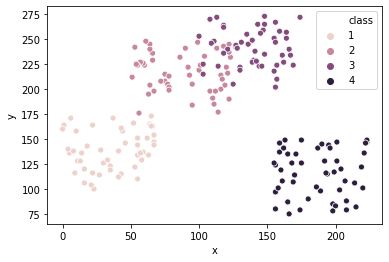

In [64]:
sbn.scatterplot(x=df.x, y=df.y, hue=df["class"])

In [65]:
#eigene KNN

def split_data(data):
    'Input LabelEcode Daten: erstelle Test und Trainingsdatensätze'
    y = data["class"]
    X = data[["x","y"]]
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=123)
    
    return X_train, X_test, y_train, y_test

def label_encode(data):
    'Label-Encode Daten -> aus String wird einzigartige Zahl'
    encoder = LabelEncoder()
    for  col in data.columns:
        data[col]=encoder.fit_transform(data[col])
    return data

def calc_distance(row1, row2):
    'berechnet euklidischen Abstand: sqrt((x1-x2)**2)'
    distance=0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i] )**2
    return math.sqrt(distance)

def get_neighbour(train, row_test, k,y):
    'ermittelt die k nächsten Nachbarn und gibt sie in Liste zurück'    
    distances = []
    for row in train:
        dist=calc_distance(row_test, row)
        distances.append((row,dist,y))
    distances.sort(key=lambda t: t[1]) #sortiert nach der zweiten Stelle im Tupel
    neighbours = []
    for i in range(k):
        neighbours.append(distances[i])
    return neighbours

def predict(neighbours):
    'ermittelt aus y der Nachbarn das y des zu bestimmtenden Pilzes'
    neighbours
    y= [i[-1] for i in neighbours] # gibt die Klasse aller Nachbarn in Liste aus
    pred = max(set(y), key=y.count) # gibt häufigste Klasse
    return pred


def valid(y_test, pred):
    'ermittle Richtigkeit für Confusion Matrix (TP,FN, TN, FP)'
    if pred == 1:
        if y_test == pred:
            return "TP"
        else:
            return "FP"
    else:
        if y_test==pred:
            return "TN"
        else:
            return  "FN"
        
def eval_results(results, anz):
    'berechne Kennzahlen zur Validierung des Systems'
    key = Counter(results).keys()
    values = Counter(results).values()
    eval_dict = dict(zip(key, values))

    print(eval_dict)

    try:
        tp= eval_dict["TP"]
    except:
        tp=0
    try:
        fn=eval_dict["FN"]
    except:
        fn=0
    try:
        tn = eval_dict["TN"]
    except:
        tn=0
    try:
        fp = eval_dict["FP"]
    except:
        fp=0


    sensitivity = tp / (tp+fn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print(f"sensitivity:{sensitivity}, precision:{precision}, accuracy:{accuracy}")

#-------------------------------#
file_path= r".\data\mushrooms.csv"


data= label_encode((df))
X_train, X_test, y_train, y_test = split_data(data)

y = y_train.tolist()
train = X_train.values.tolist()

results=[]
# len(X_test)
gesamt_anzahl= 10
preds = pd.Series()
for i in range(gesamt_anzahl):
    t0 = time.time()
    row = X_test.iloc[i].tolist()
    neighbours = get_neighbour(train, row, 10, y_train.iloc[i])
    pred = predict(neighbours)
    preds = preds.append(pd.Series([pred]))
    result = valid(y_test.iloc[i], pred)
    results.append(result)
    print(f"Zeit: {(time.time()-t0):.2}")


# real = pd.DataFrame(data=y_test)
# real = real[:gesamt_anzahl]
# print(preds, real)
# valid_data = real.insert(1,"pred",preds, allow_duplicates=True)
# print(valid_data)
# class_report = metrics.classification_report()
eval_results(results, gesamt_anzahl)


Zeit: 0.001
Zeit: 0.0011
Zeit: 0.001
Zeit: 0.0011
Zeit: 0.001
Zeit: 0.0011
Zeit: 0.001
Zeit: 0.0013
Zeit: 0.0012
Zeit: 0.00095
{'TP': 2, 'TN': 4, 'FN': 3, 'FP': 1}
sensitivity:0.4, precision:0.6666666666666666, accuracy:0.6
